In [570]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [571]:
import os

data_path = "bike_sharing_dataset/"

files = os.listdir(data_path)
print(files)

['SeoulBikeData.csv']


In [572]:
df = pd.read_csv(data_path + "SeoulBikeData.csv", header=None)
print(df.head())

           0                  1     2               3            4   \
0        Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)   
1  01/12/2017                254     0            -5.2           37   
2  01/12/2017                204     1            -5.5           38   
3  01/12/2017                173     2              -6           39   
4  01/12/2017                107     3            -6.2           40   

                 5                 6                         7   \
0  Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)   
1               2.2              2000                     -17.6   
2               0.8              2000                     -17.6   
3                 1              2000                     -17.7   
4               0.9              2000                     -17.6   

                        8             9              10       11           12  \
0  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday Day   
1       

In [573]:
# Transform the data
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.drop(columns=['Date'])

In [574]:
df

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
...                ...  ...            ...         ...              ...   
8756              1003   19            4.2          34              2.6   
8757               764   20            3.4          37              2.3   
8758               694   21            2.6          39              0.3   
8759               712   22            2.1          41                1   
8760               584   23            1.9          43              1.3   

0    Visibility (10m) Dew point temperature(C) Solar Radiation (MJ/m2)  \
1                2000                    -17.6                       0   
2                2000                    -17.6                       0   
3                2000                    -17.7                       0   
4                2000                    -17.6                       0   
5                2000                    -18.6                       0   
...               ...                      ...                     ...   
8756             1894                    -10.3                       0   
8757             2000                     -9.9                       0   
8758             1968                     -9.9                       0   
8759             1859                     -9.8                       0   
8760             1909                     -9.3                       0   

0    Rainfall(mm) Snowfall (cm) Seasons Holiday Day Functioning Day  
1               0             0  Winter  No Holiday             Yes  
2               0             0  Winter  No Holiday             Yes  
3               0             0  Winter  No Holiday             Yes  
4               0             0  Winter  No Holiday             Yes  
5               0             0  Winter  No Holiday             Yes  
...           ...           ...     ...         ...             ...  
8756            0             0  Autumn  No Holiday             Yes  
8757            0             0  Autumn  No Holiday             Yes  
8758            0             0  Autumn  No Holiday             Yes  
8759            0             0  Autumn  No Holiday             Yes  
8760            0             0  Autumn  No Holiday             Yes  

[8760 rows x 13 columns]

In [575]:
df['Seasons'] = df['Seasons'].replace({'Winter': 0, 'Autumn': 1, 'Spring': 2, 'Summer': 3})
df['Holiday Day'] = df['Holiday Day'].replace({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].replace({'No': 0, 'Yes': 1})

In [576]:
df

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
...                ...  ...            ...         ...              ...   
8756              1003   19            4.2          34              2.6   
8757               764   20            3.4          37              2.3   
8758               694   21            2.6          39              0.3   
8759               712   22            2.1          41                1   
8760               584   23            1.9          43              1.3   

0    Visibility (10m) Dew point temperature(C) Solar Radiation (MJ/m2)  \
1                2000                    -17.6                       0   
2                2000                    -17.6                       0   
3                2000                    -17.7                       0   
4                2000                    -17.6                       0   
5                2000                    -18.6                       0   
...               ...                      ...                     ...   
8756             1894                    -10.3                       0   
8757             2000                     -9.9                       0   
8758             1968                     -9.9                       0   
8759             1859                     -9.8                       0   
8760             1909                     -9.3                       0   

0    Rainfall(mm) Snowfall (cm)  Seasons  Holiday Day  Functioning Day  
1               0             0        0            0                1  
2               0             0        0            0                1  
3               0             0        0            0                1  
4               0             0        0            0                1  
5               0             0        0            0                1  
...           ...           ...      ...          ...              ...  
8756            0             0        1            0                1  
8757            0             0        1            0                1  
8758            0             0        1            0                1  
8759            0             0        1            0                1  
8760            0             0        1            0                1  

[8760 rows x 13 columns]

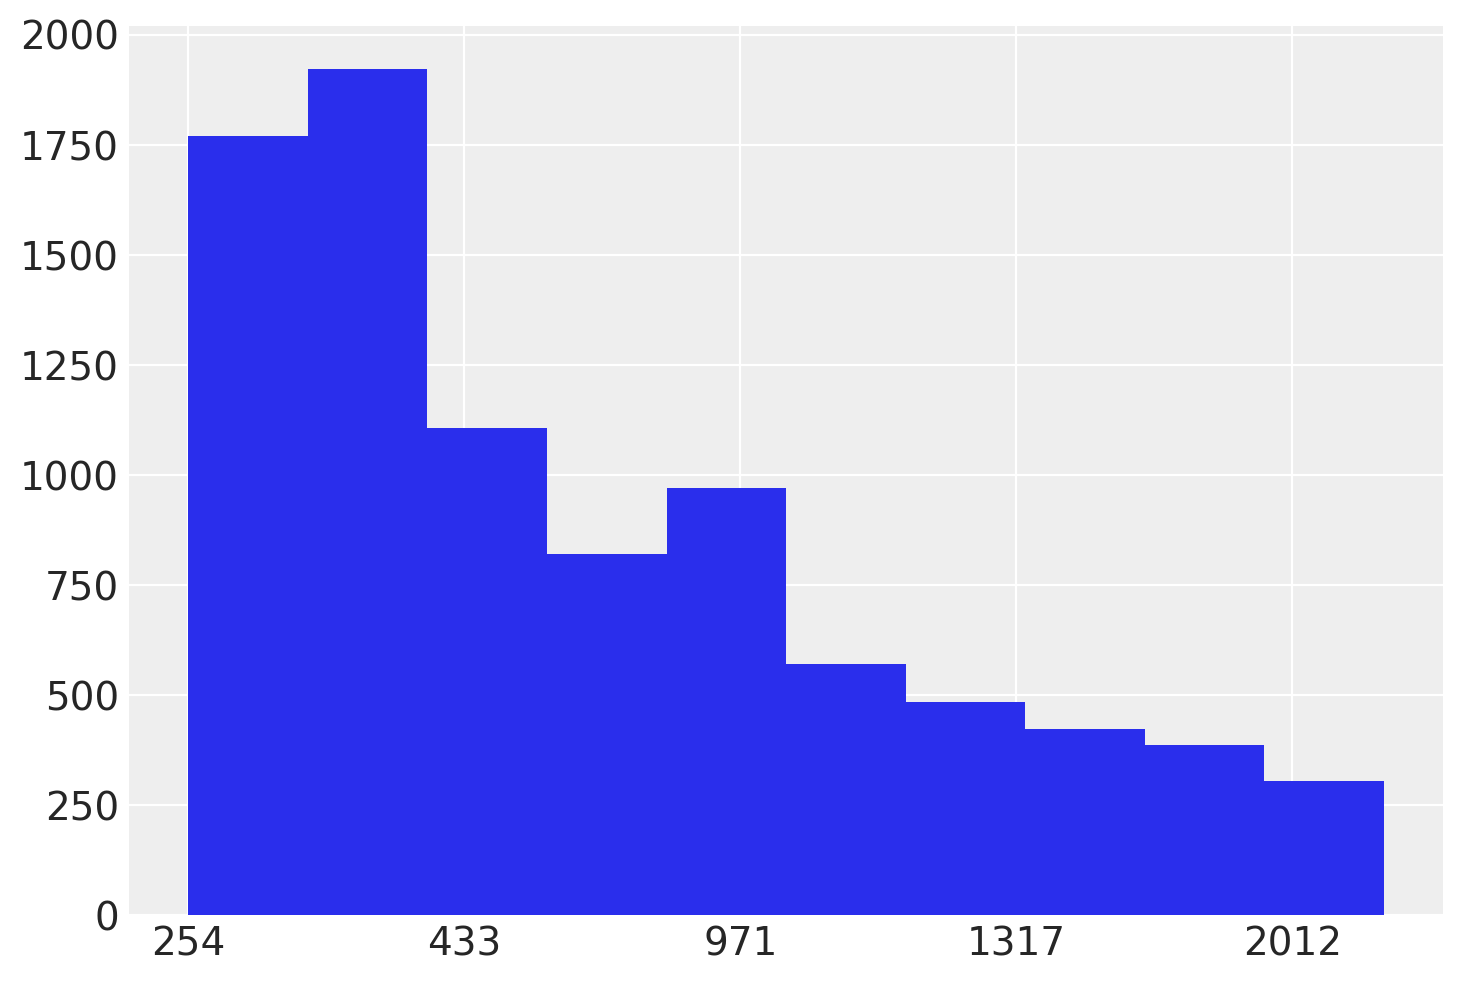

In [577]:
# Count of bikes rented at each hour
fig, ax = plt.subplots()
#create histogram using specified figure size
ax = fig.gca()
loc = plticker.MultipleLocator(base=500) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
df['Rented Bike Count'].hist(ax=ax)
plt.show()

In [578]:
X = df.astype(float)
y = X.pop('Rented Bike Count')

# Standardize the features
X -= X.mean()
X /= X.std()

N, D = X.shape

In [579]:
df

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
...                ...  ...            ...         ...              ...   
8756              1003   19            4.2          34              2.6   
8757               764   20            3.4          37              2.3   
8758               694   21            2.6          39              0.3   
8759               712   22            2.1          41                1   
8760               584   23            1.9          43              1.3   

0    Visibility (10m) Dew point temperature(C) Solar Radiation (MJ/m2)  \
1                2000                    -17.6                       0   
2                2000                    -17.6                       0   
3                2000                    -17.7                       0   
4                2000                    -17.6                       0   
5                2000                    -18.6                       0   
...               ...                      ...                     ...   
8756             1894                    -10.3                       0   
8757             2000                     -9.9                       0   
8758             1968                     -9.9                       0   
8759             1859                     -9.8                       0   
8760             1909                     -9.3                       0   

0    Rainfall(mm) Snowfall (cm)  Seasons  Holiday Day  Functioning Day  
1               0             0        0            0                1  
2               0             0        0            0                1  
3               0             0        0            0                1  
4               0             0        0            0                1  
5               0             0        0            0                1  
...           ...           ...      ...          ...              ...  
8756            0             0        1            0                1  
8757            0             0        1            0                1  
8758            0             0        1            0                1  
8759            0             0        1            0                1  
8760            0             0        1            0                1  

[8760 rows x 13 columns]

In [580]:
D0 = int(D / 2)

In [581]:
# source: https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#id1
import pytensor.tensor as at

with pm.Model(coords={"predictors": X.columns.values}) as bike_count_model:
    # Prior on error SD
    sigma = pm.HalfNormal("sigma", 25)

    # Global shrinkage prior
    tau = pm.HalfStudentT("tau", 2, D0 / (D - D0) * sigma / np.sqrt(N))
    # Local shrinkage prior
    lam = pm.HalfStudentT("lam", 5, dims="predictors")
    c2 = pm.InverseGamma("c2", 1, 1)
    z = pm.Normal("z", 0.0, 1.0, dims="predictors")
    # Shrunken coefficients
    beta = pm.Deterministic(
        "beta", z * tau * lam * at.sqrt(c2 / (c2 + tau**2 * lam**2)), dims="predictors"
    )
    # No shrinkage on intercept
    beta0 = pm.Normal("beta0", 100, 25.0)

    scores = pm.Normal("scores", beta0 + at.dot(X.values, beta), sigma, observed=y.values)

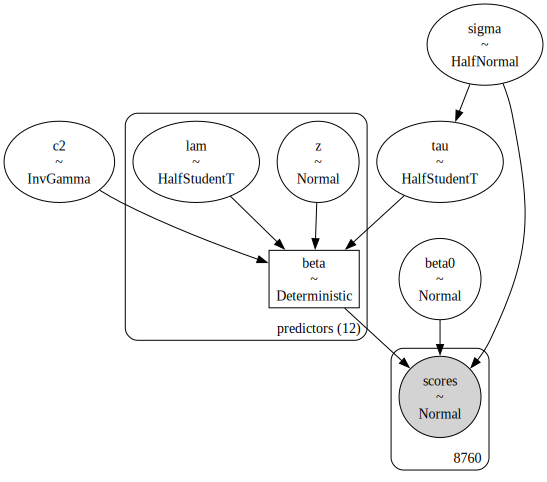

In [582]:
pm.model_to_graphviz(bike_count_model)

In [583]:
with bike_count_model:
    prior_samples = pm.sample_prior_predictive(100)

Sampling: [beta0, c2, lam, scores, sigma, tau, z]


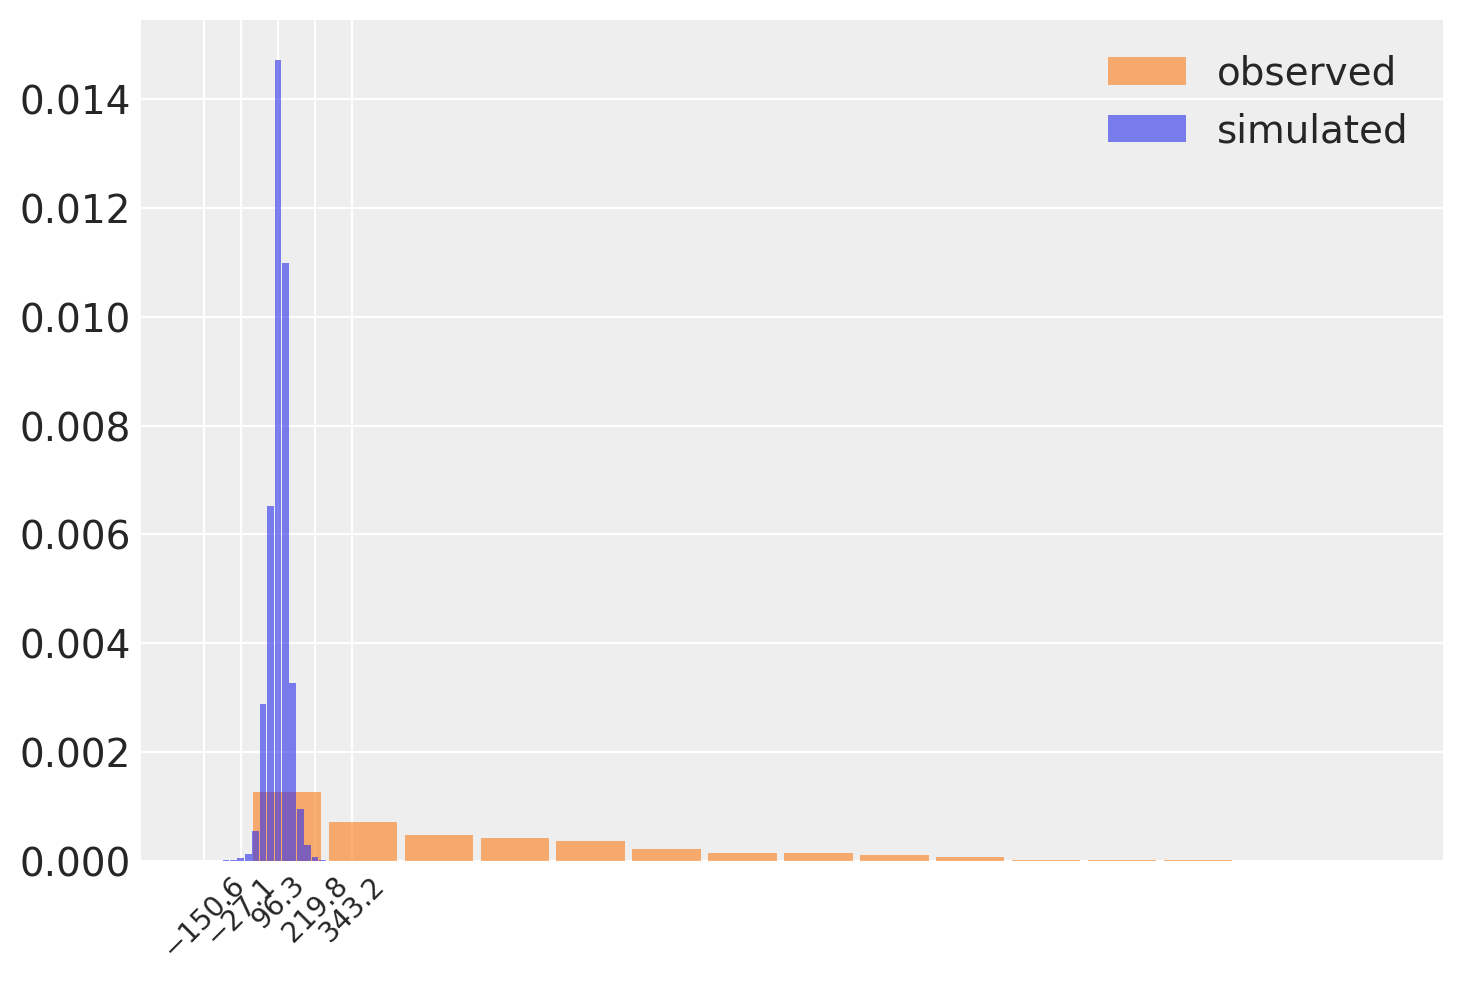

In [584]:
az.plot_dist(
    df['Rented Bike Count'].values.astype(float),
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    prior_samples.prior_predictive["scores"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(fontsize=10, rotation=45);

In [586]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 231 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 272 divergences after tuning. Increase `target_accept` or reparameterize.


In [587]:
az.summary(idata, round_to=2)

mean          sd   hdi_3%    hdi_97%  \
z[Hour]                              1.51        0.46     0.67       2.34   
z[Temperature(C)]                    2.11        0.56     1.13       3.23   
z[Humidity(%)]                      -1.44        0.46    -2.25      -0.57   
z[Wind speed (m/s)]                  0.30        0.45    -0.18       1.44   
z[Visibility (10m)]                  0.50        0.41     0.04       1.26   
z[Dew point temperature(C)]          0.87        0.59    -0.13       2.12   
z[Solar Radiation (MJ/m2)]          -0.90        0.47    -1.72      -0.23   
z[Rainfall(mm)]                     -0.83        0.43    -1.64      -0.24   
z[Snowfall (cm)]                     0.19        0.45    -0.54       1.30   
z[Seasons]                          -0.16        0.47    -1.26       0.57   
z[Holiday Day]                      -0.56        0.44    -1.43      -0.07   
z[Functioning Day]                   1.26        0.48     0.53       2.20   
beta0                              684.05        4.42   676.17     692.86   
sigma                              437.94        3.05   432.46     444.11   
tau                                173.00      215.77    37.50     376.10   
lam[Hour]                            1.61        0.89     0.36       3.25   
lam[Temperature(C)]                  2.21        1.22     0.43       4.34   
lam[Humidity(%)]                     1.57        0.94     0.33       3.18   
lam[Wind speed (m/s)]                0.49        0.60     0.00       1.50   
lam[Visibility (10m)]                0.67        0.68     0.01       1.85   
lam[Dew point temperature(C)]        0.98        0.89     0.00       2.49   
lam[Solar Radiation (MJ/m2)]         0.97        0.71     0.07       2.25   
lam[Rainfall(mm)]                    1.09        0.81     0.07       2.42   
lam[Snowfall (cm)]                   0.41        0.58     0.00       1.40   
lam[Seasons]                         0.44        0.57     0.00       1.45   
lam[Holiday Day]                     1.08        1.27     0.04       4.36   
lam[Functioning Day]                 1.55        0.99     0.24       3.23   
c2                              172670.81  1316740.26  6964.89  339472.05   
beta[Hour]                         187.91        5.14   178.05     197.12   
beta[Temperature(C)]               320.98       45.18   238.36     395.82   
beta[Humidity(%)]                 -173.07       22.48  -212.23    -130.60   
beta[Wind speed (m/s)]               6.86        5.24    -2.38      16.76   
beta[Visibility (10m)]              20.06        6.27     7.25      31.55   
beta[Dew point temperature(C)]      73.41       52.91    -9.11     168.17   
beta[Solar Radiation (MJ/m2)]      -66.22        6.96   -79.15     -53.07   
beta[Rainfall(mm)]                 -67.04        4.93   -76.22     -57.74   
beta[Snowfall (cm)]                  3.93        4.66    -4.23      12.66   
beta[Seasons]                       -4.80        7.87   -21.41       7.31   
beta[Holiday Day]                  -30.80        4.75   -40.26     -22.37   
beta[Functioning Day]              146.07        4.75   136.81     154.66   

                                mcse_mean   mcse_sd  ess_bulk  ess_tail  r_hat  
z[Hour]                              0.01      0.01    712.84   1495.97   1.01  
z[Temperature(C)]                    0.01      0.01   1402.81   1560.30   1.03  
z[Humidity(%)]                       0.01      0.01    893.53   1166.03   1.02  
z[Wind speed (m/s)]                  0.01      0.01   1170.94   1111.65   1.02  
z[Visibility (10m)]                  0.01      0.01    589.99   1434.71   1.01  
z[Dew point temperature(C)]          0.02      0.01   1422.84    944.22   1.04  
z[Solar Radiation (MJ/m2)]           0.06      0.04     78.04   1500.68   1.04  
z[Rainfall(mm)]                      0.01      0.01   1297.38   1137.37   1.05  
z[Snowfall (cm)]                     0.01      0.01    680.32    810.81   1.01  
z[Seasons]                           0.02      0.01    166.28   1202.

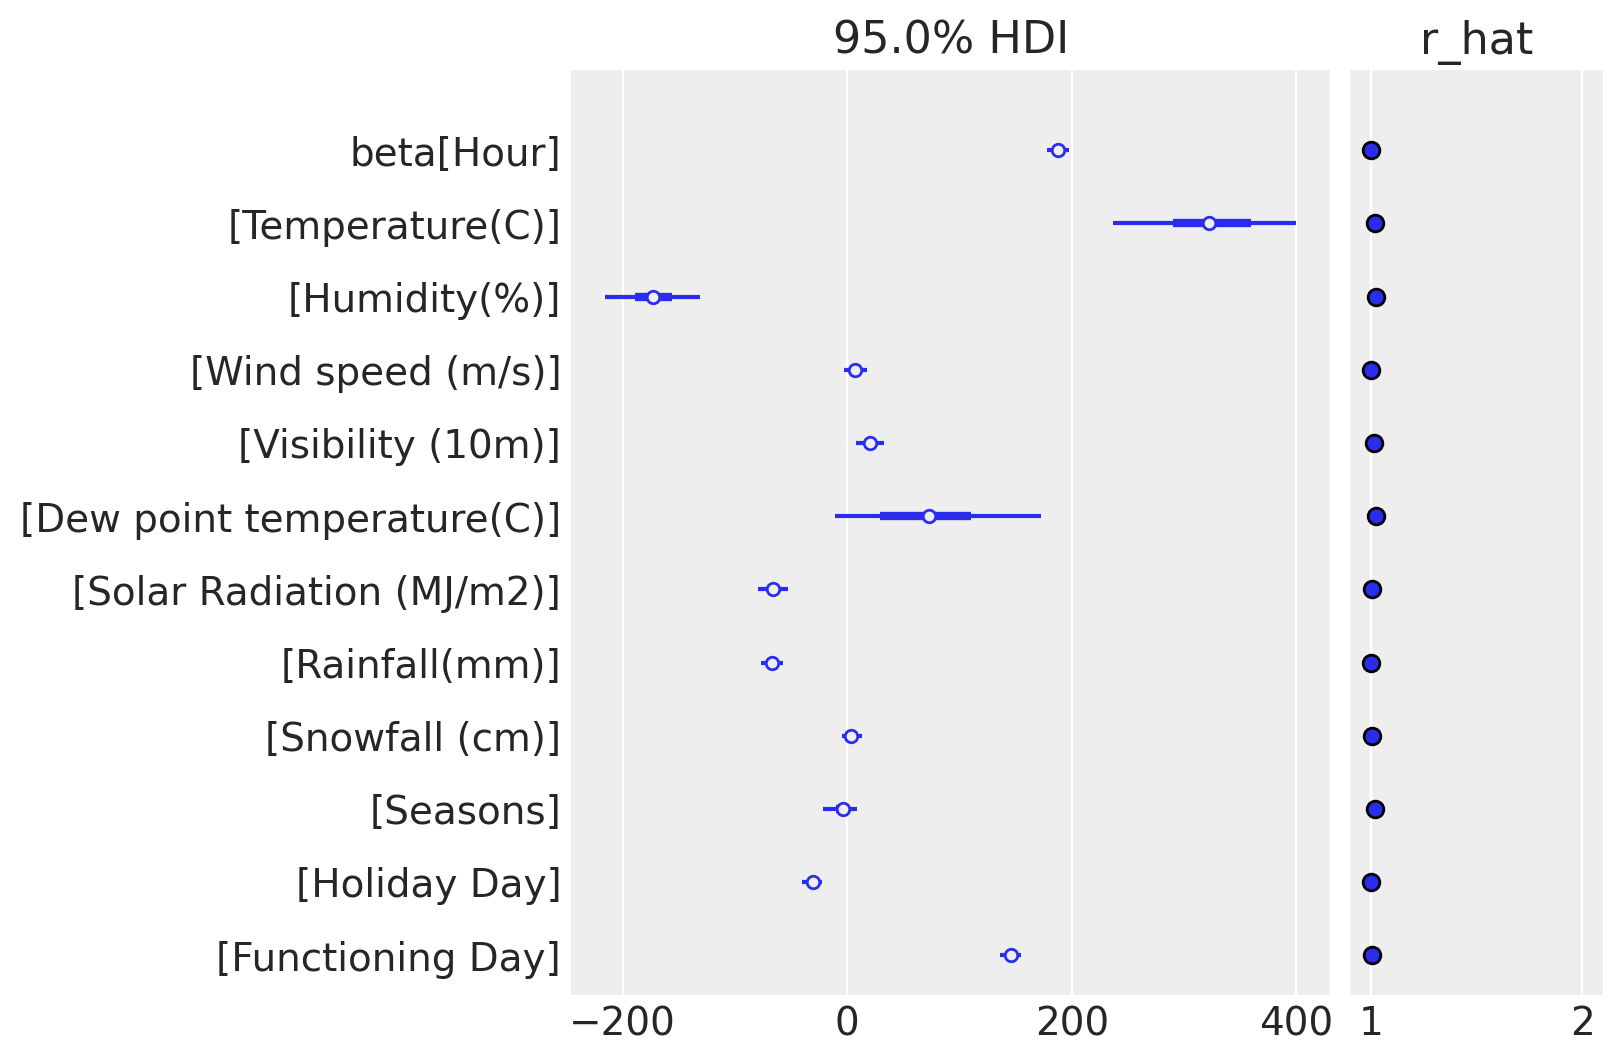

In [588]:
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True);

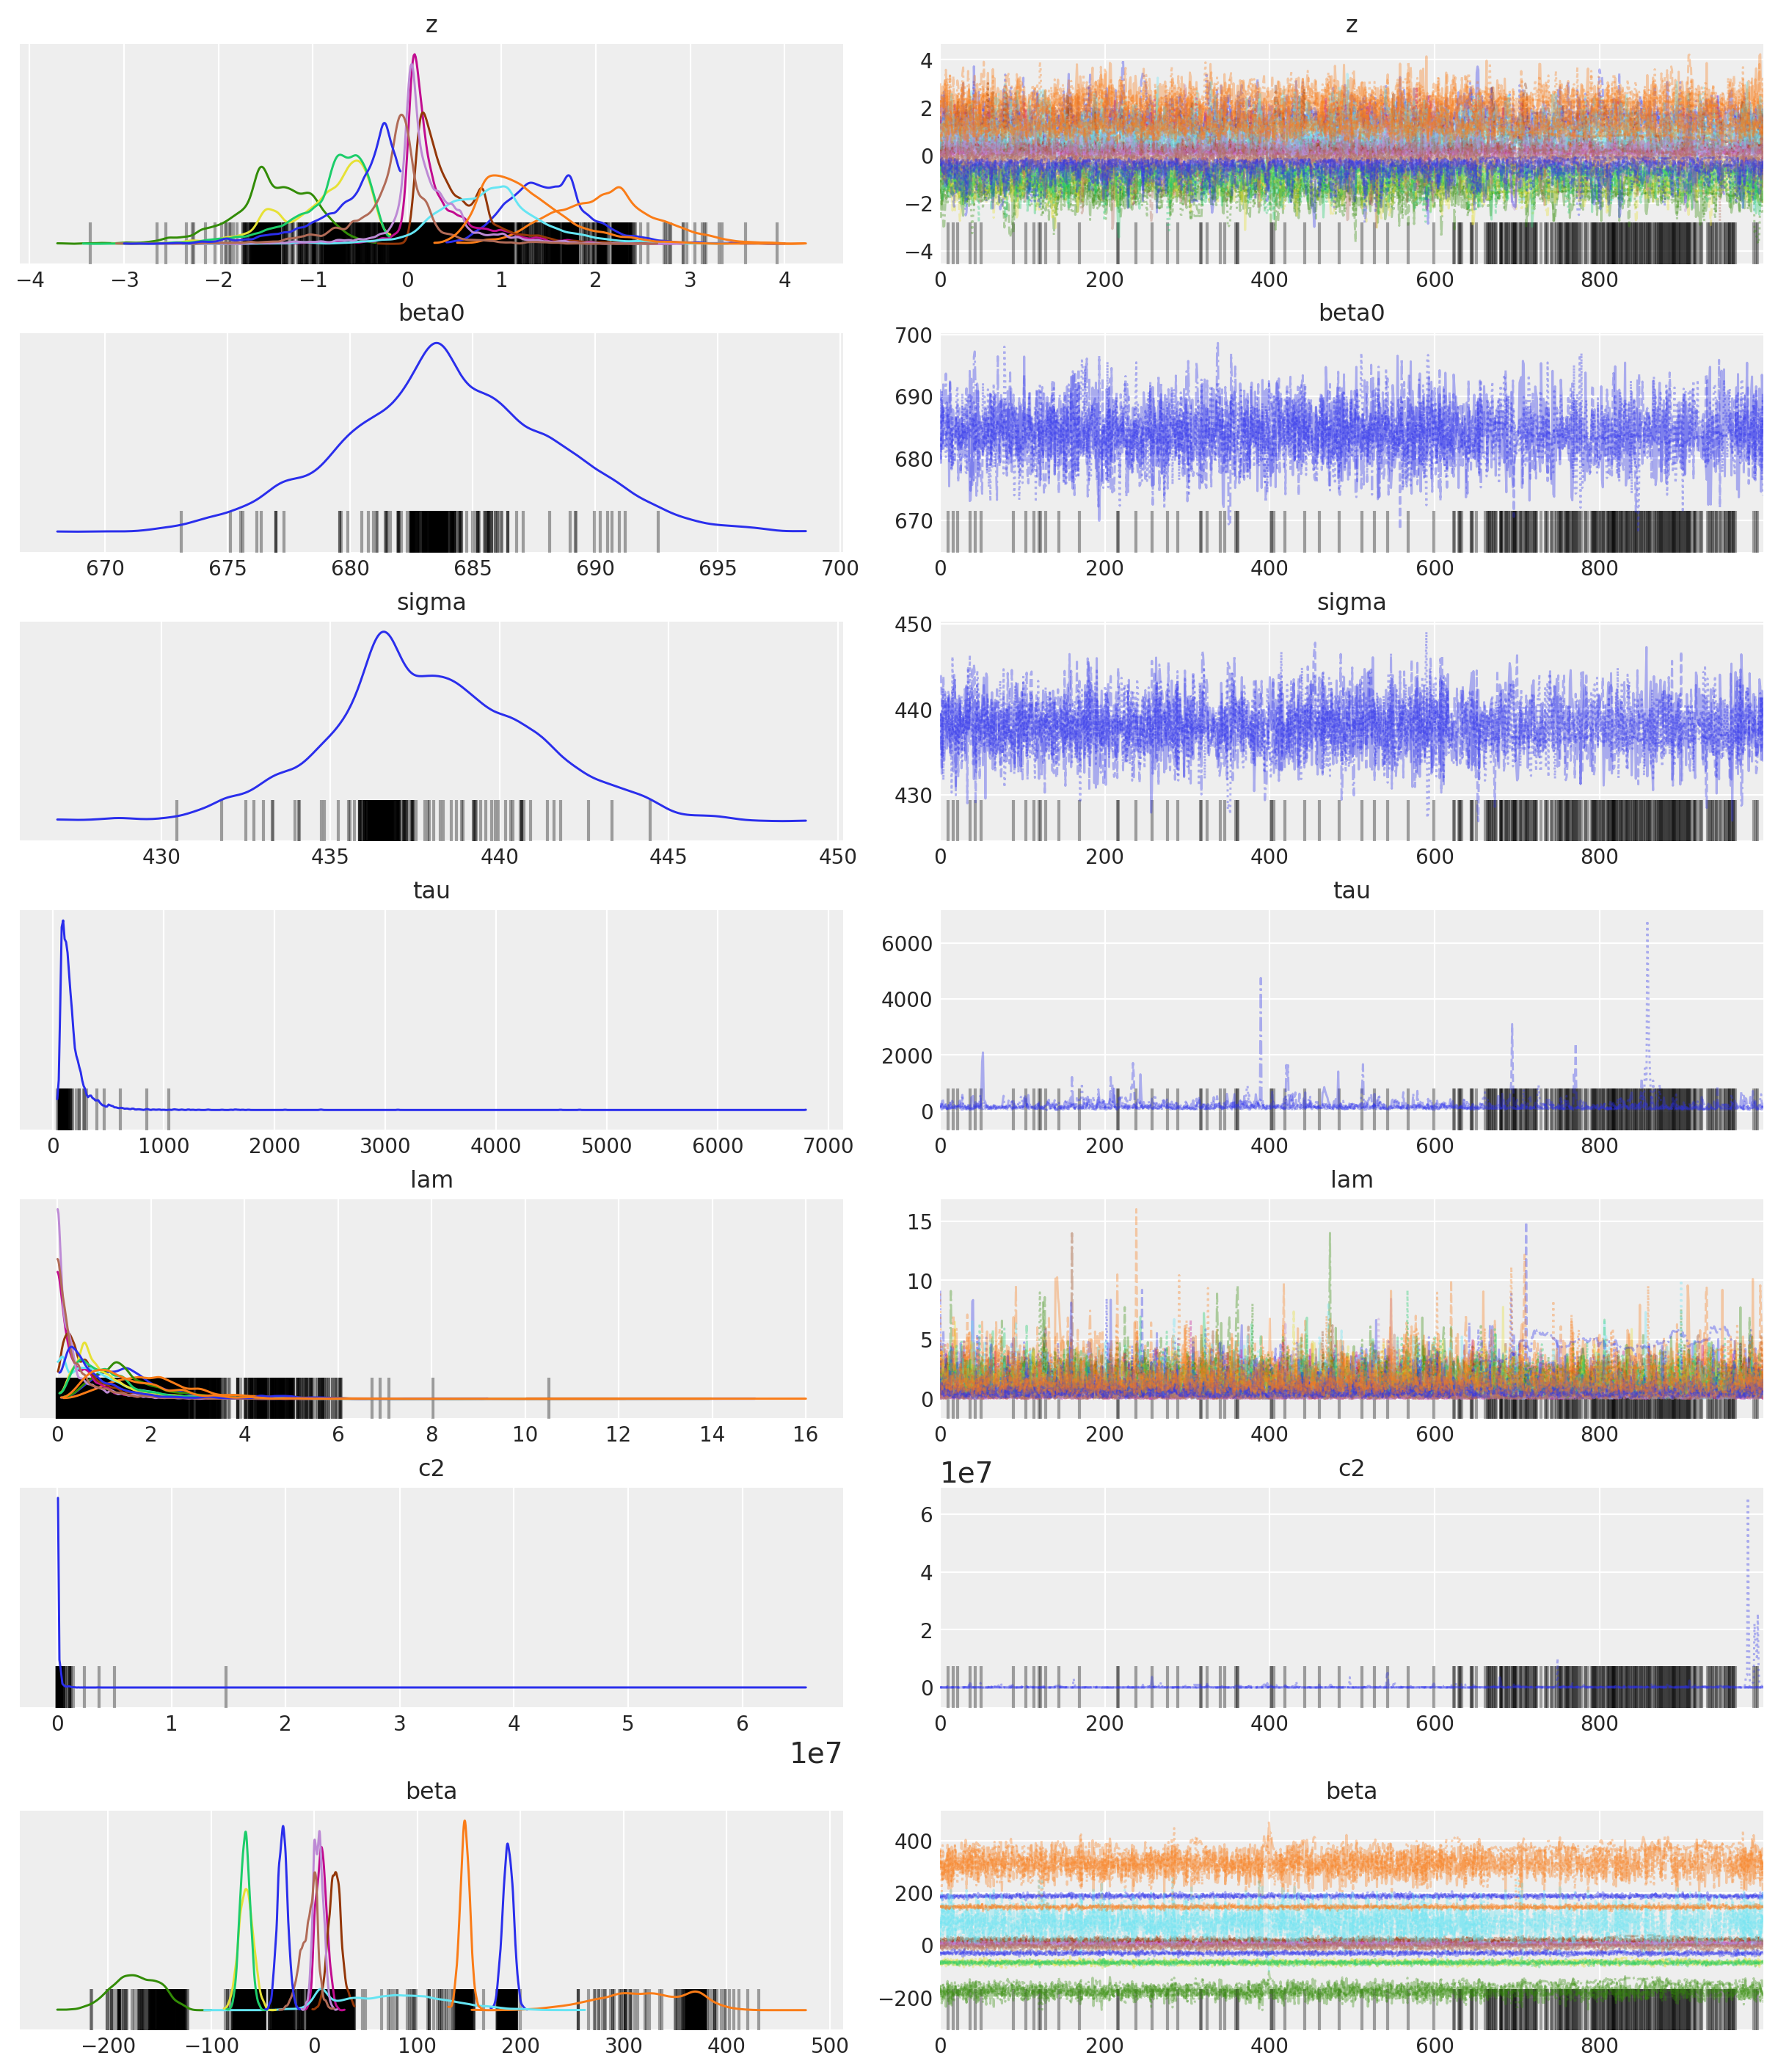

In [589]:
az.plot_trace(idata, combined=True);

Trying to find distribution of values for estimated parameters

In [ ]:
predictors = X.columns.values
coords = {"predictors": predictors}

with pm.Model(coords=coords) as model:
    # Priors for unknown model parameters
    
    sigma = pm.HalfNormal('sigma', sigma=20) # sd of the error term
    intercept = pm.Normal('intercept', mu=0, sigma=20) 
    # coefficients for each predictor
    coeffs = pm.Normal('coeffs', mu=0, sigma=20, dims='predictors') 

    # Expected value: lin comb of coeffs and predictors
    mu = pm.math.dot(coeffs, X.T) + intercept 
    
    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

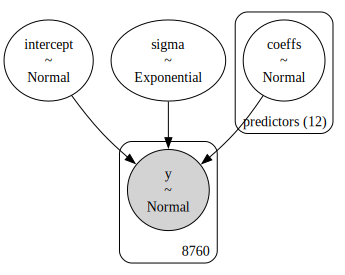

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with model:
    idata = pm.sample(1000, random_seed=42, progressbar=True, cores=4)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, coeffs]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


In [ ]:
az.summary(idata, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
intercept                         668.23   4.63  660.04   677.15       0.05   
coeffs[Hour]                      185.82   4.96  176.66   195.49       0.06   
coeffs[Temperature(C)]            229.67  13.58  202.74   254.10       0.22   
coeffs[Humidity(%)]              -167.06   8.64 -183.05  -150.38       0.14   
coeffs[Wind speed (m/s)]            7.26   5.02   -1.83    17.05       0.06   
coeffs[Visibility (10m)]           31.21   5.55   20.93    41.64       0.07   
coeffs[Dew point temperature(C)]  127.22  14.68   99.06   154.23       0.24   
coeffs[Solar Radiation (MJ/m2)]   -40.96   5.90  -52.10   -30.09       0.07   
coeffs[Rainfall(mm)]              -65.19   4.76  -74.05   -56.15       0.05   
coeffs[Snowfall (cm)]               0.35   4.71   -8.30     9.47       0.06   
coeffs[Seasons]                    18.51   7.71    4.13    33.08       0.10   
coeffs[Holiday Day]               -28.62   4.51  -37.04   -20.16       0.05   
coeffs[Functioning Day]           136.59   4.63  127.82   145.18       0.06   
sigma                             436.99   3.17  430.93   442.84       0.04   

                                  mcse_sd  ess_bulk  ess_tail  r_hat  
intercept                            0.04   7753.71   3084.77    1.0  
coeffs[Hour]                         0.04   6408.05   3134.20    1.0  
coeffs[Temperature(C)]               0.16   3899.53   2705.87    1.0  
coeffs[Humidity(%)]                  0.10   3795.26   3014.14    1.0  
coeffs[Wind speed (m/s)]             0.05   6879.78   2849.91    1.0  
coeffs[Visibility (10m)]             0.05   5892.80   3294.79    1.0  
coeffs[Dew point temperature(C)]     0.17   3614.18   2572.71    1.0  
coeffs[Solar Radiation (MJ/m2)]      0.05   6333.39   3182.65    1.0  
coeffs[Rainfall(mm)]                 0.04   7541.92   2808.71    1.0  
coeffs[Snowfall (cm)]                0.08   7291.73   3237.68    1.0  
coeffs[Seasons]                      0.08   6172.26   3244.84    1.0  
coeffs[Holiday Day]                  0.04   6832.45   2896.57    1.0  
coeffs[Functioning Day]              0.04   5845.89   3165.81    1.0  
sigma                                0.03   7564.93   2928.11    1.0

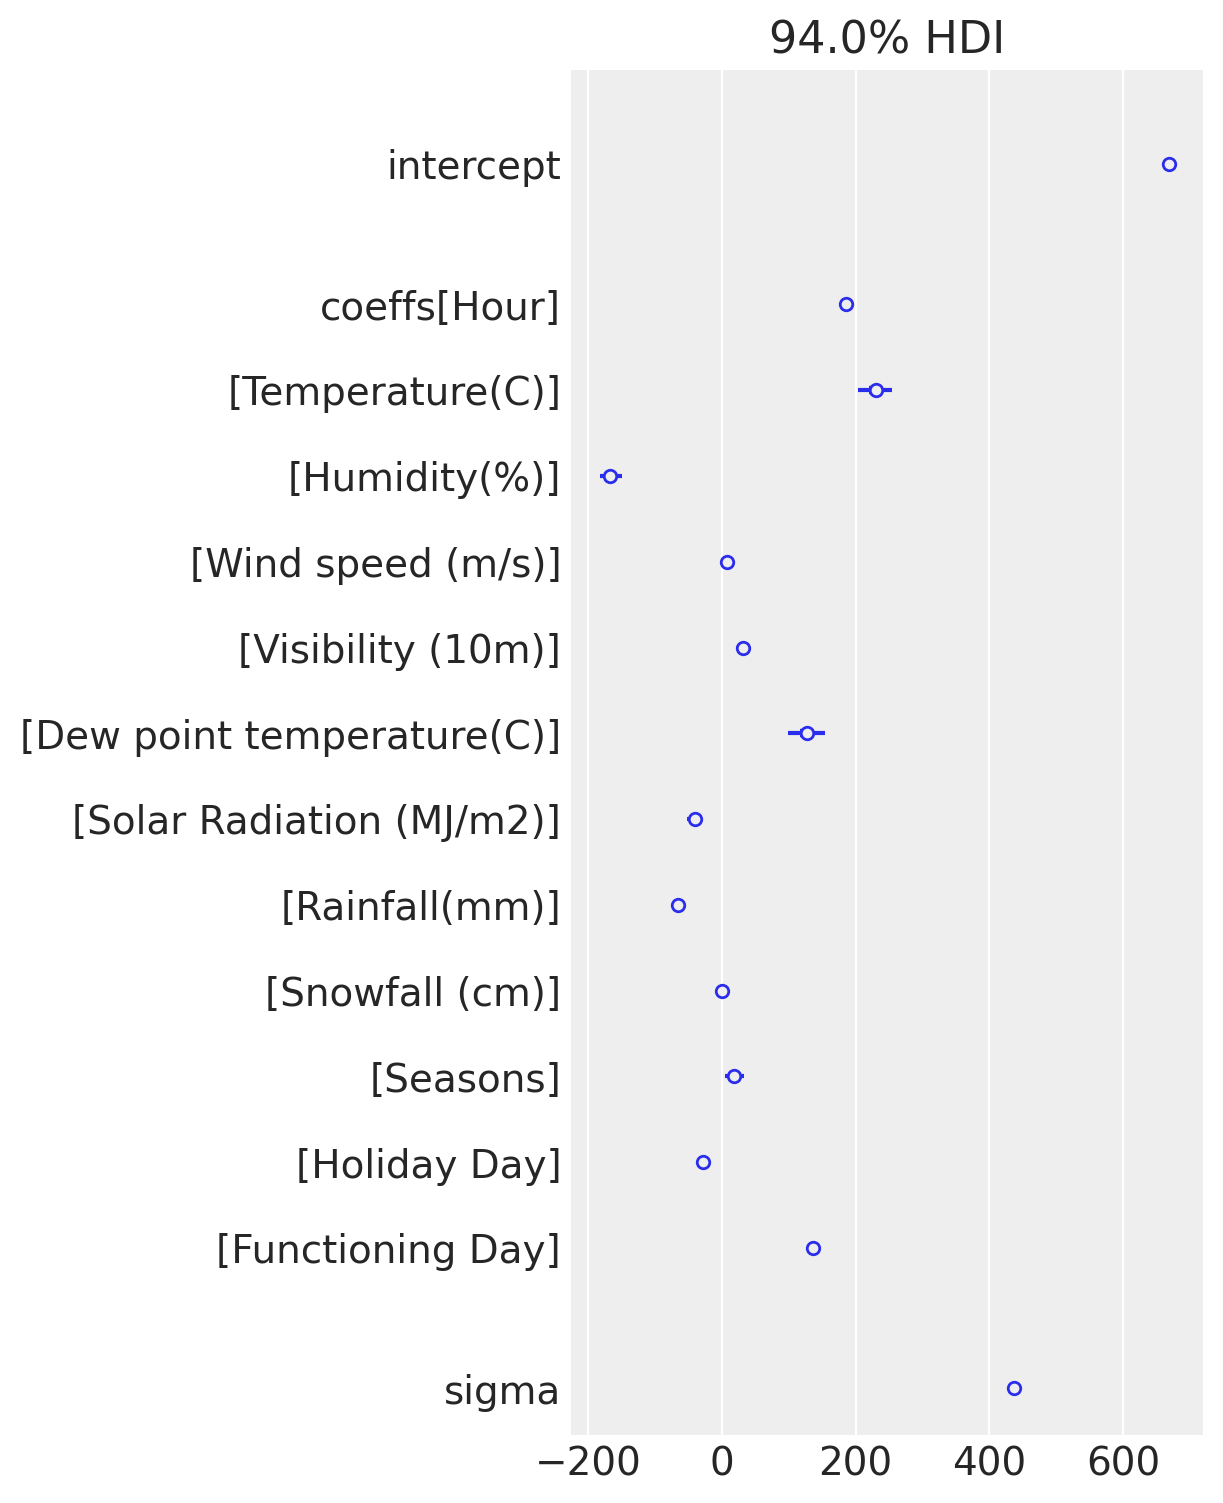

In [ ]:
az.plot_forest(idata, combined=True);

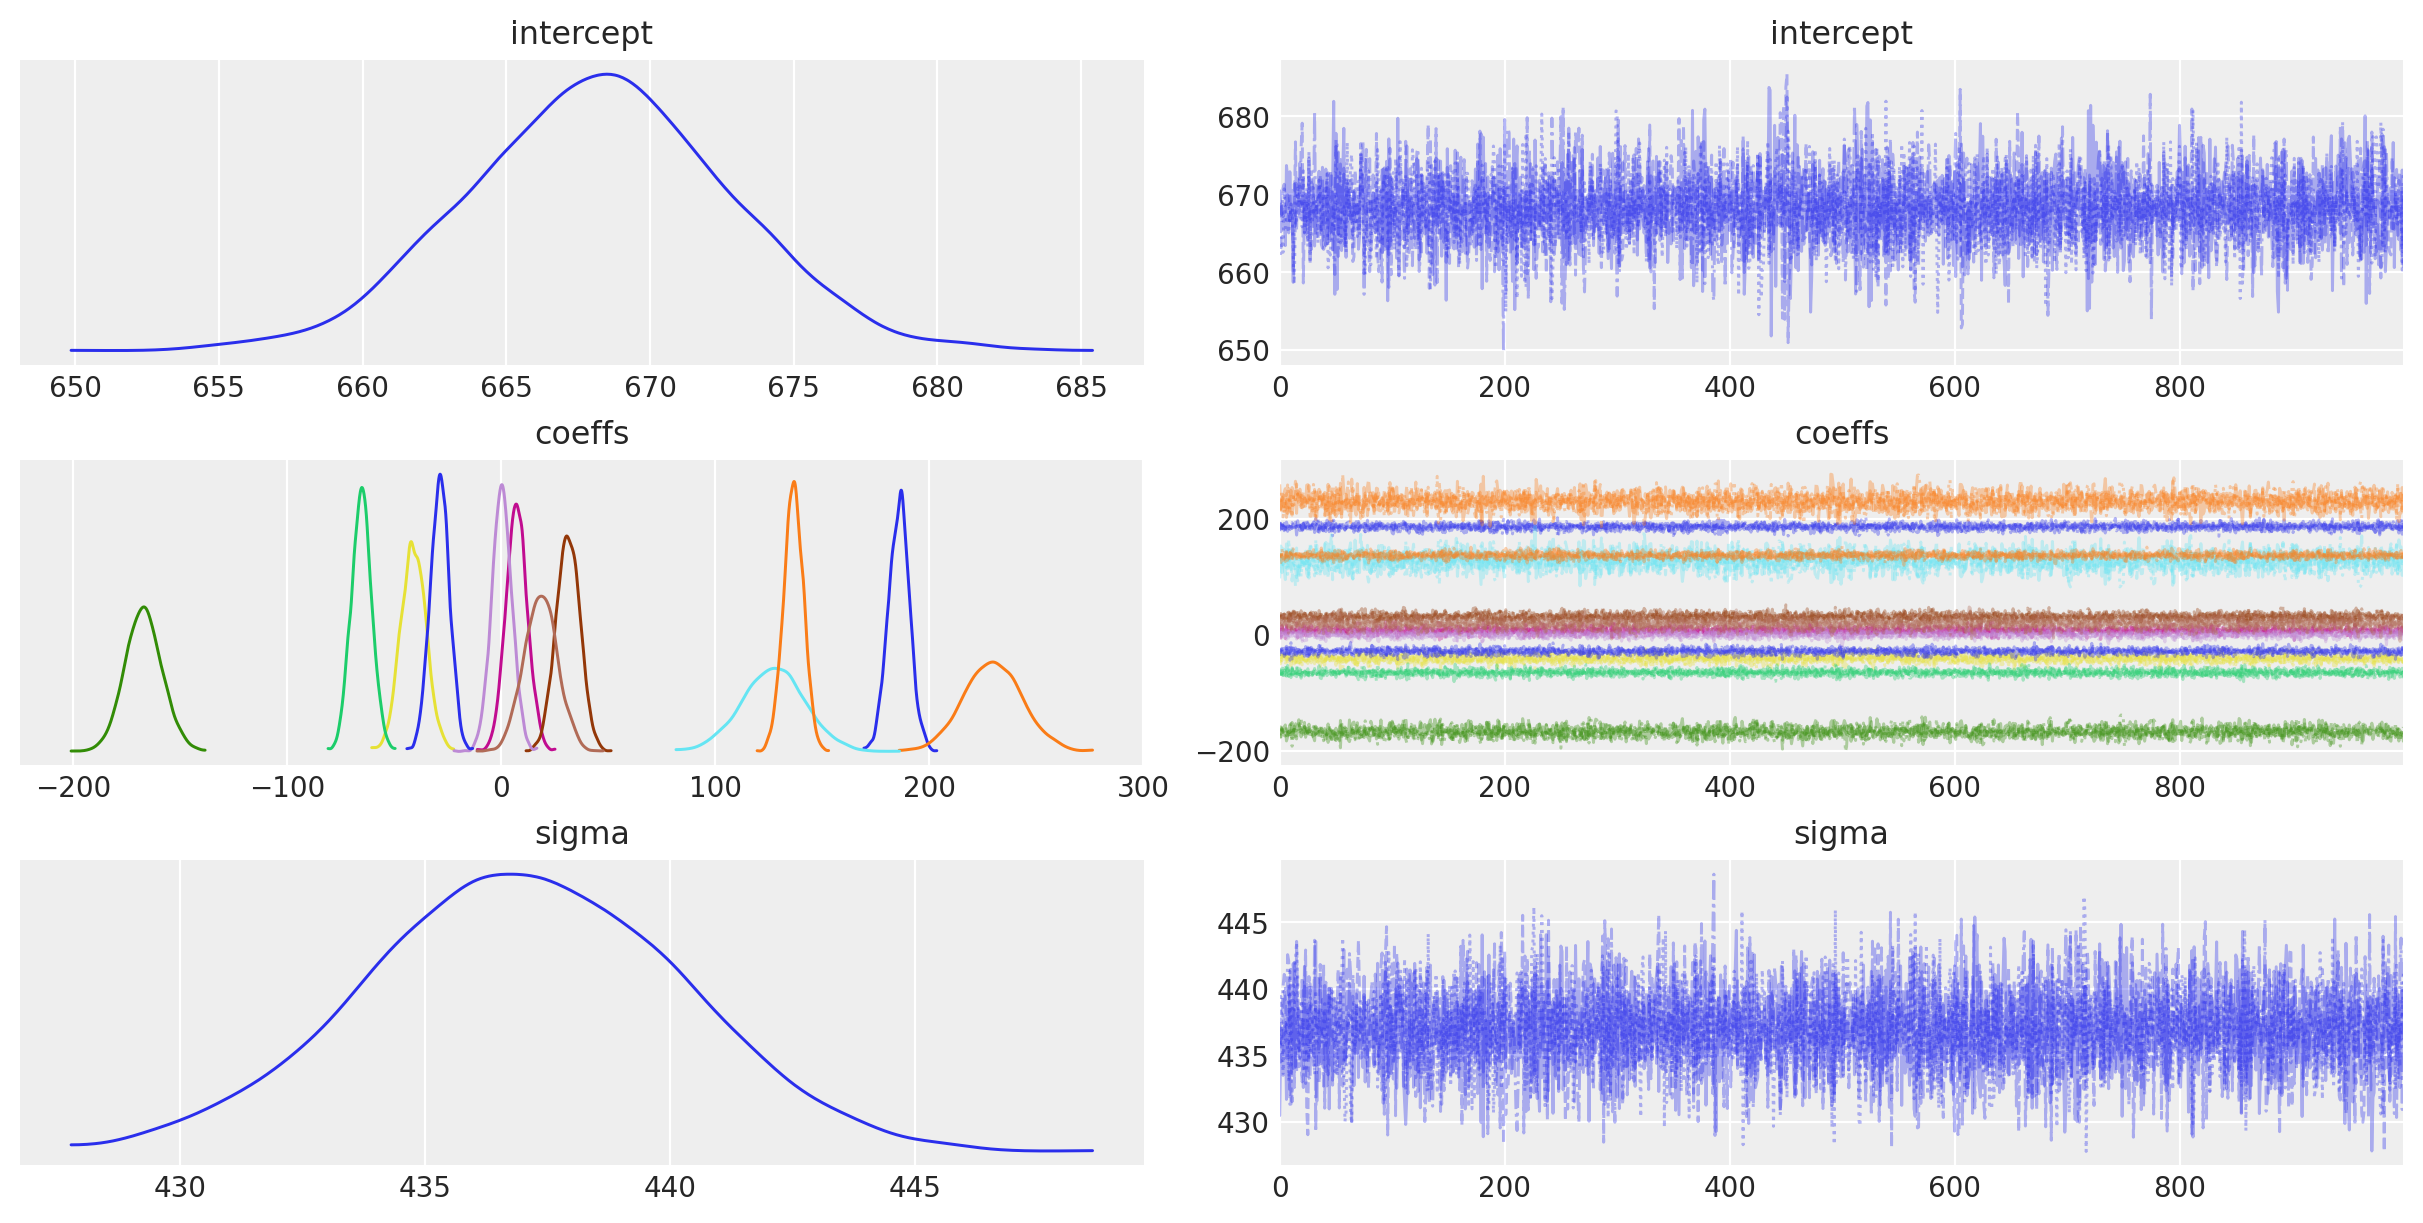

c:\Users\Ram\anaconda3\envs\pymc_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


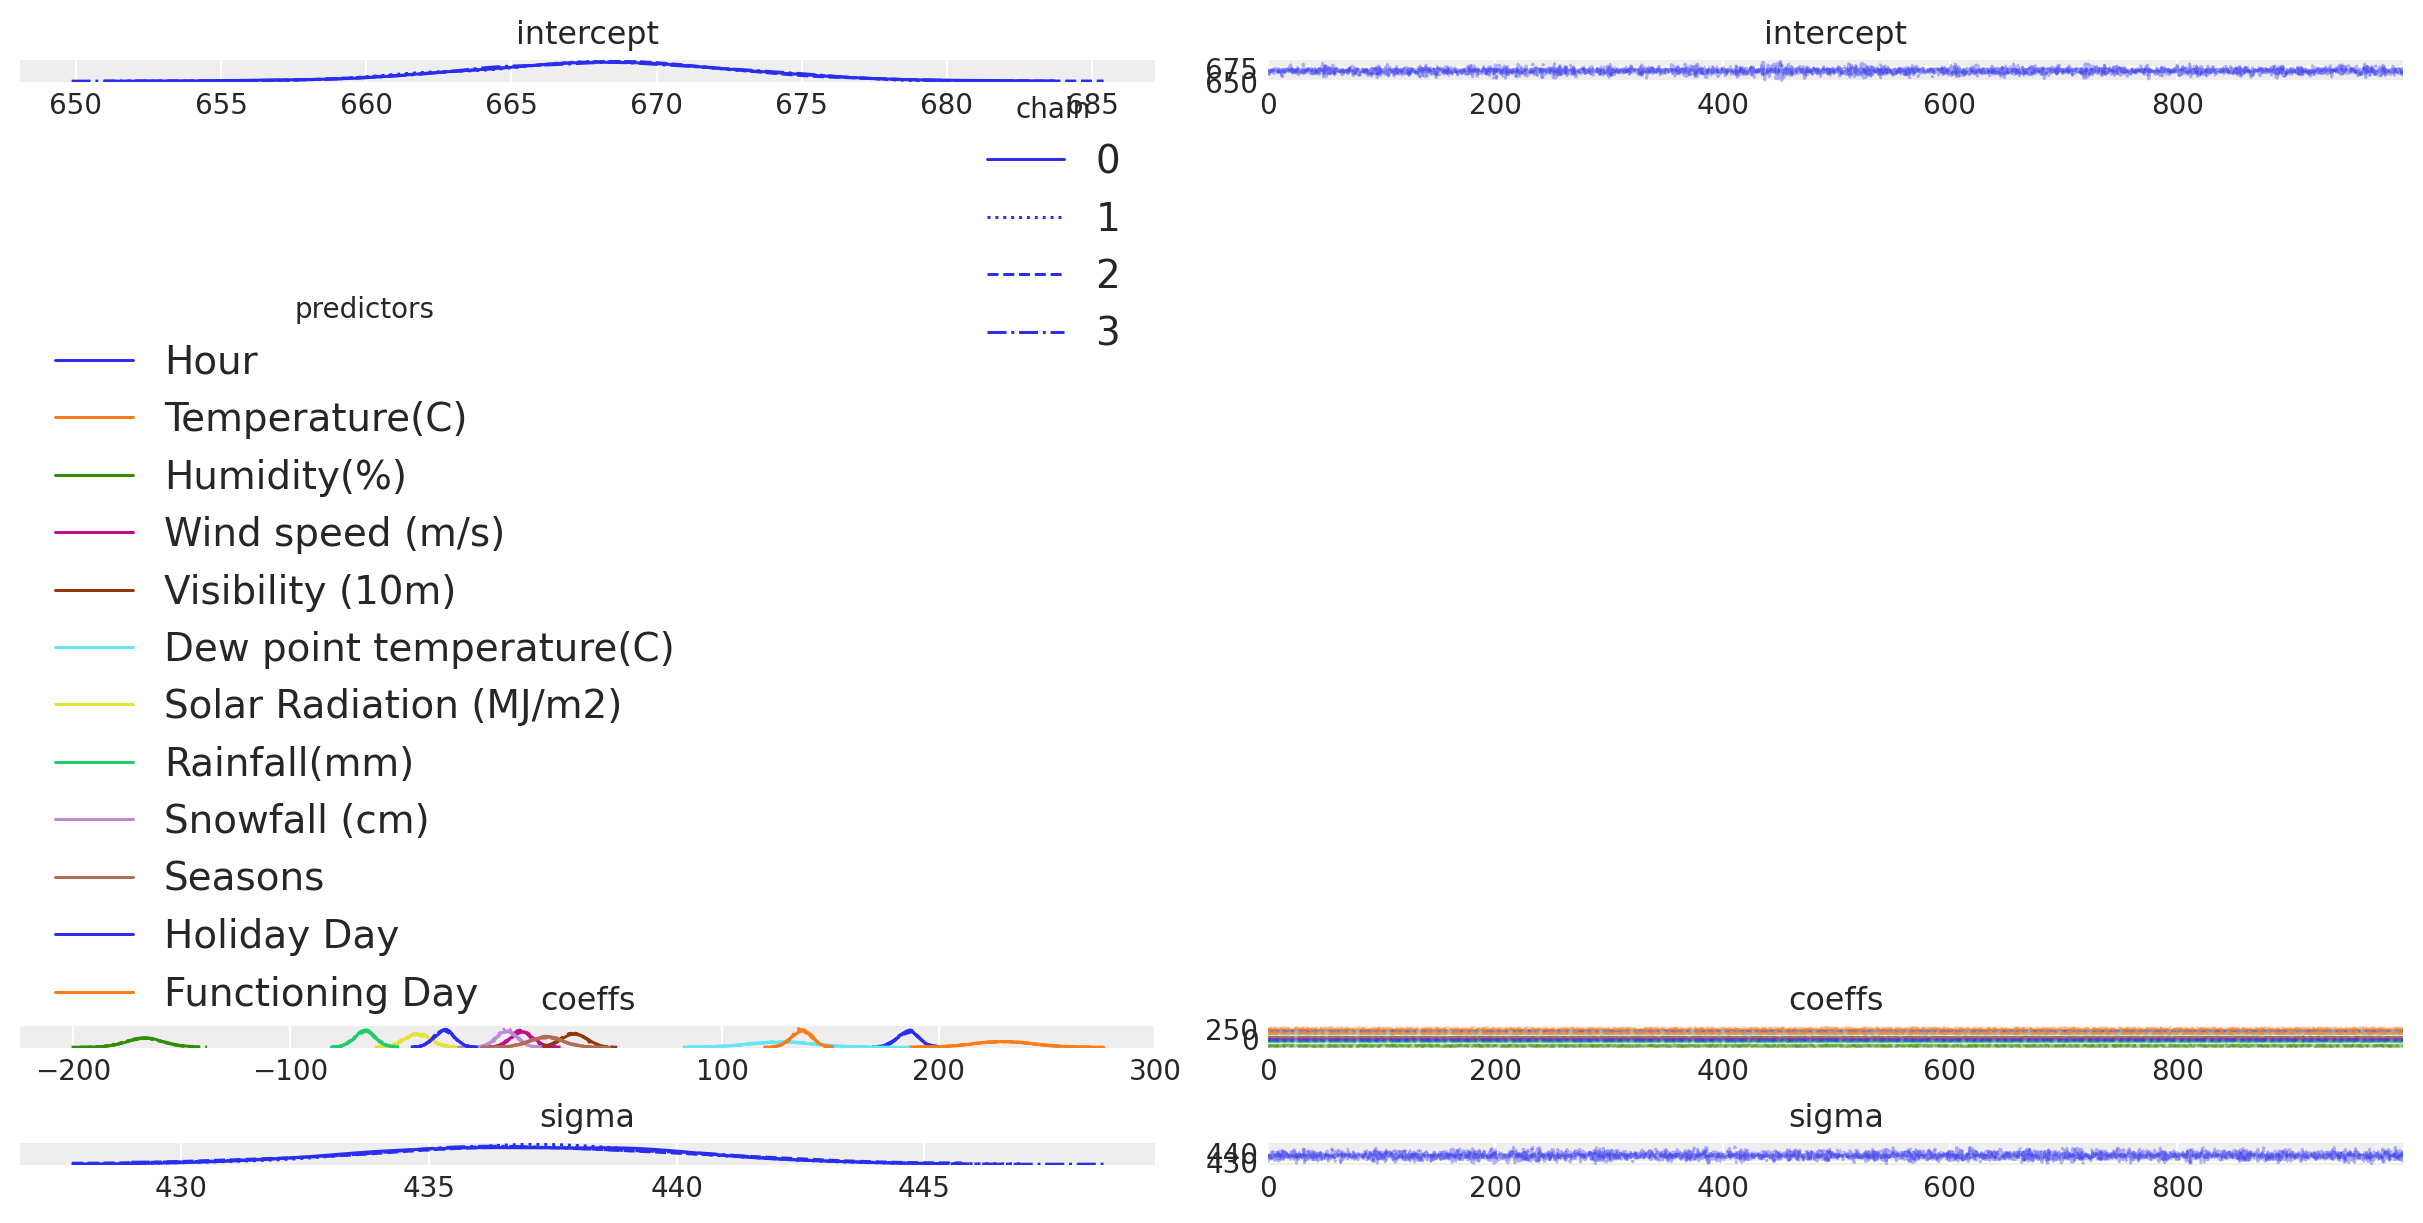

In [ ]:
az.plot_trace(idata, combined=True);
az.plot_trace(idata,legend=True);